<a href="https://colab.research.google.com/github/lee-soung-bum/WP/blob/master/%EC%99%B8%EB%B6%80%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
# 시각화 폰트 다운로드
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [ ]:
# # 시각화 폰트 설정
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location, size = 9).get_name()
print(font_name)
fm._rebuild()
plt.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

NanumGothic


In [ ]:
plt.rc('font',weight ="bold")
plt.rc('font', size=13)

# 코로나데이터 확인

In [ ]:
data = pd.read_csv("/content/drive/My Drive/데이터분석 연습/삼성카드 공모전/Track2/데이터/Time.csv")

In [ ]:
df = pd.DataFrame()

df["날짜"] = data["date"]
df["누적 검사 진행자"] = data["test"]
df["누적 확진자"] = data["confirmed"]
df["누적 완치자"] = data["released"]
df["누적 사망자"] = data["deceased"]
df["현재 검사 진행자"] = data["test"] - data["negative"] - data["confirmed"]
df["현재 확진자"] = data["confirmed"] - data["released"] - data["deceased"]

,날짜,누적 검사 진행자,누적 확진자,누적 완치자,누적 사망자,현재 검사 진행자,현재 확진자
0,2020-01-20,1,1,0,0,0,1
1,2020-01-21,1,1,0,0,0,1
2,2020-01-22,4,1,0,0,0,1
3,2020-01-23,22,1,0,0,0,1
4,2020-01-24,27,2,0,0,0,2
...,...,...,...,...,...,...,...
158,2020-06-26,1232315,12602,11172,282,18828,1148
159,2020-06-27,1243780,12653,11317,282,19866,1054
160,2020-06-28,1251695,12715,11364,282,19005,1069
161,2020-06-29,1259954,12757,11429,282,18499,1046


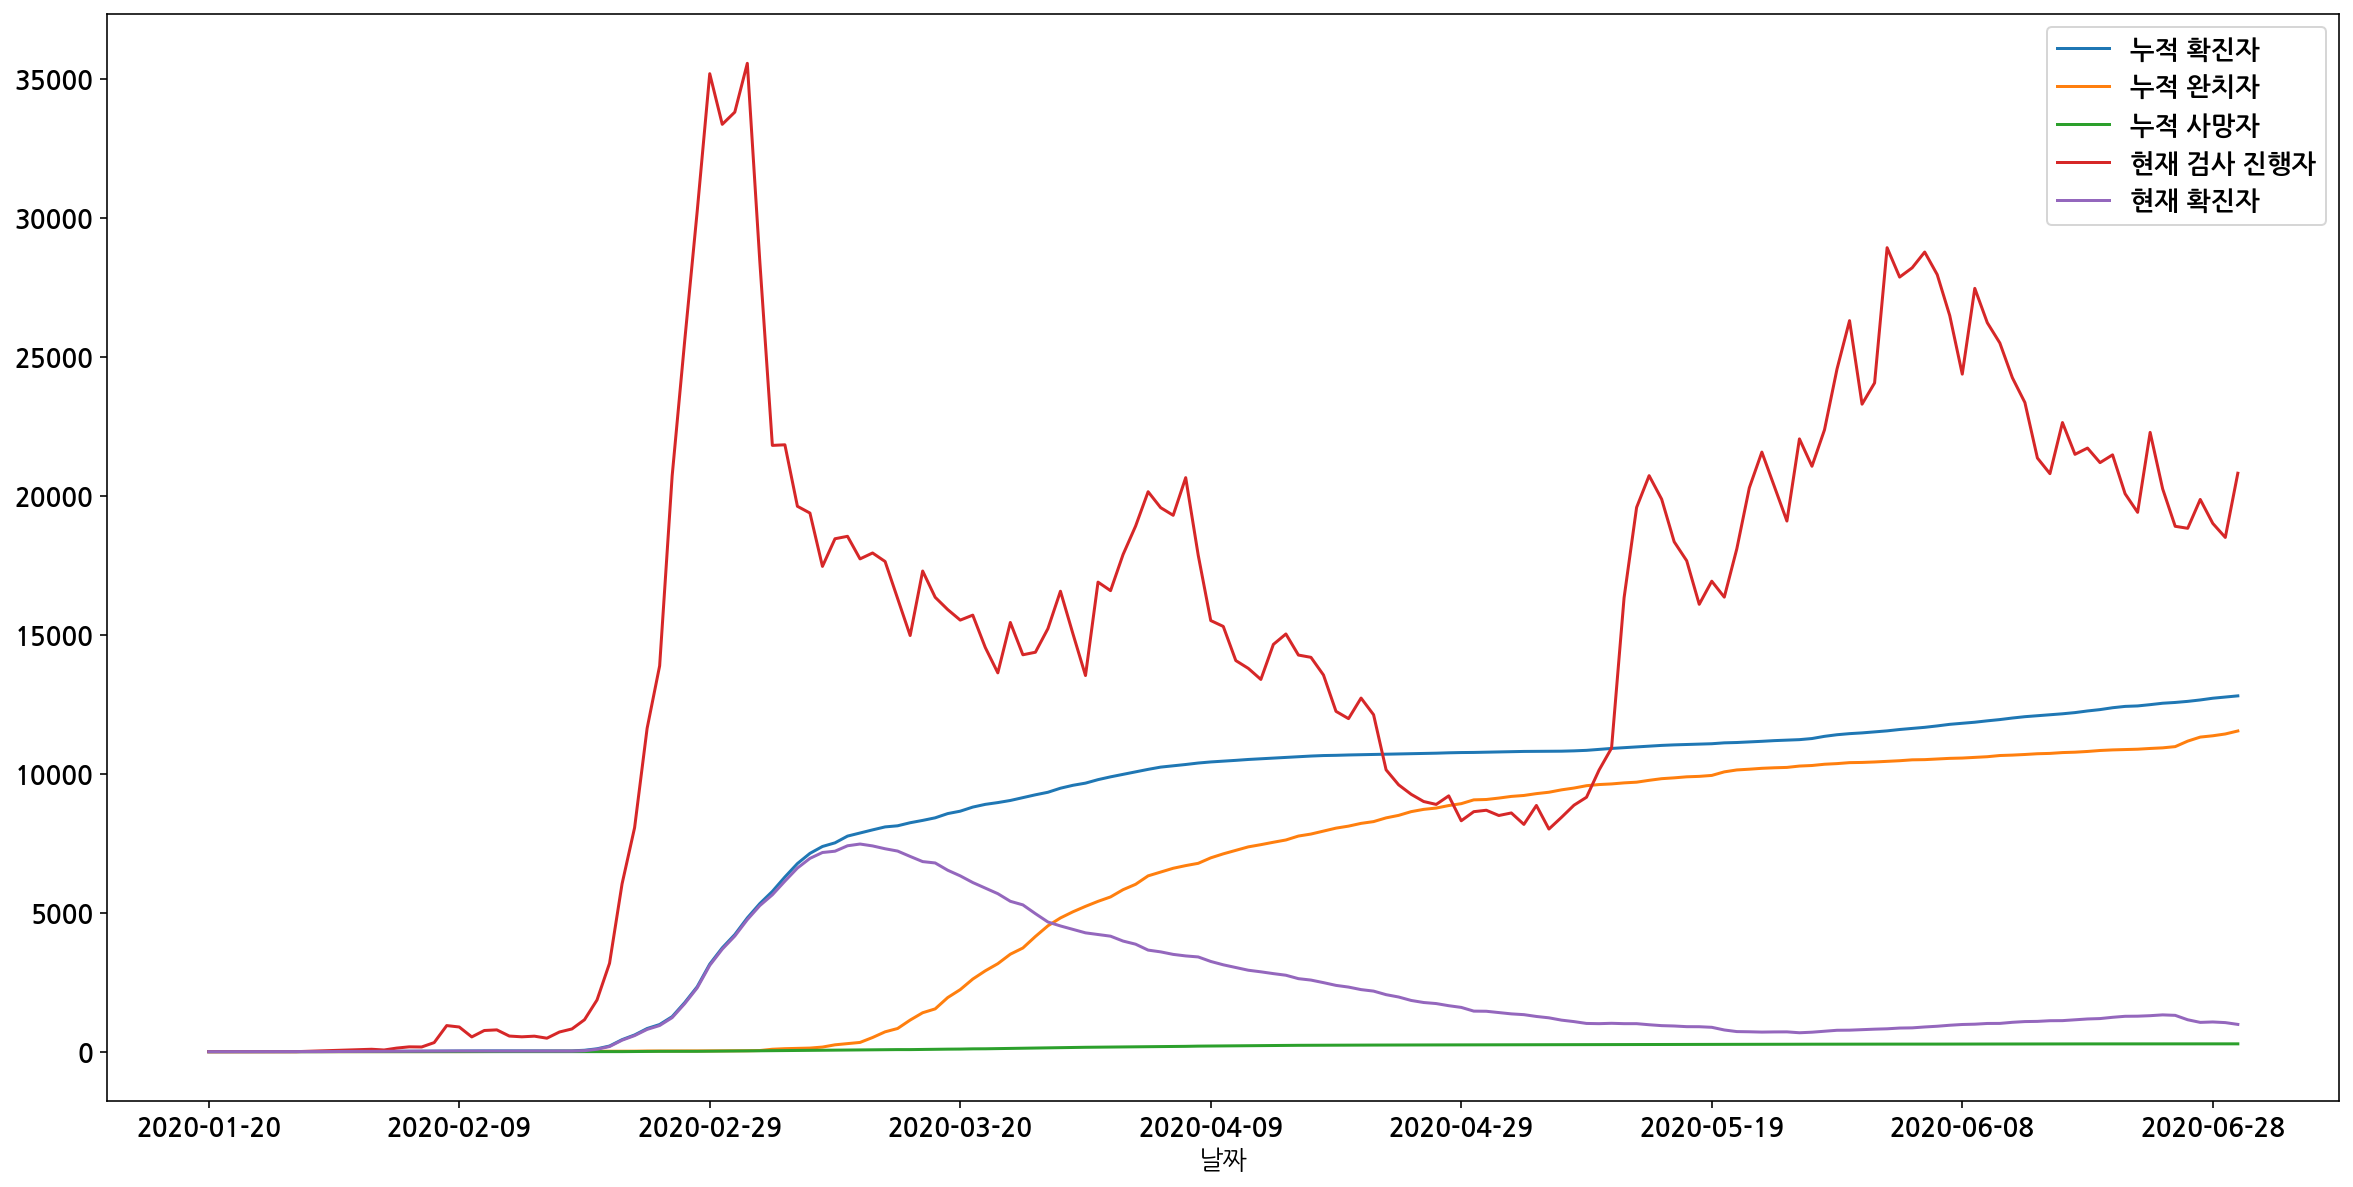

In [ ]:
df[["날짜", "누적 확진자", "누적 완치자", "누적 사망자", "현재 검사 진행자", "현재 확진자"]].plot(x="날짜", figsize=(20, 10))

# 주식데이터 확인

In [ ]:
data = pd.read_csv("/content/drive/My Drive/데이터분석 연습/삼성카드 공모전/Track2/데이터/2019_2020 시가 총액 분기분 기업순위.csv")

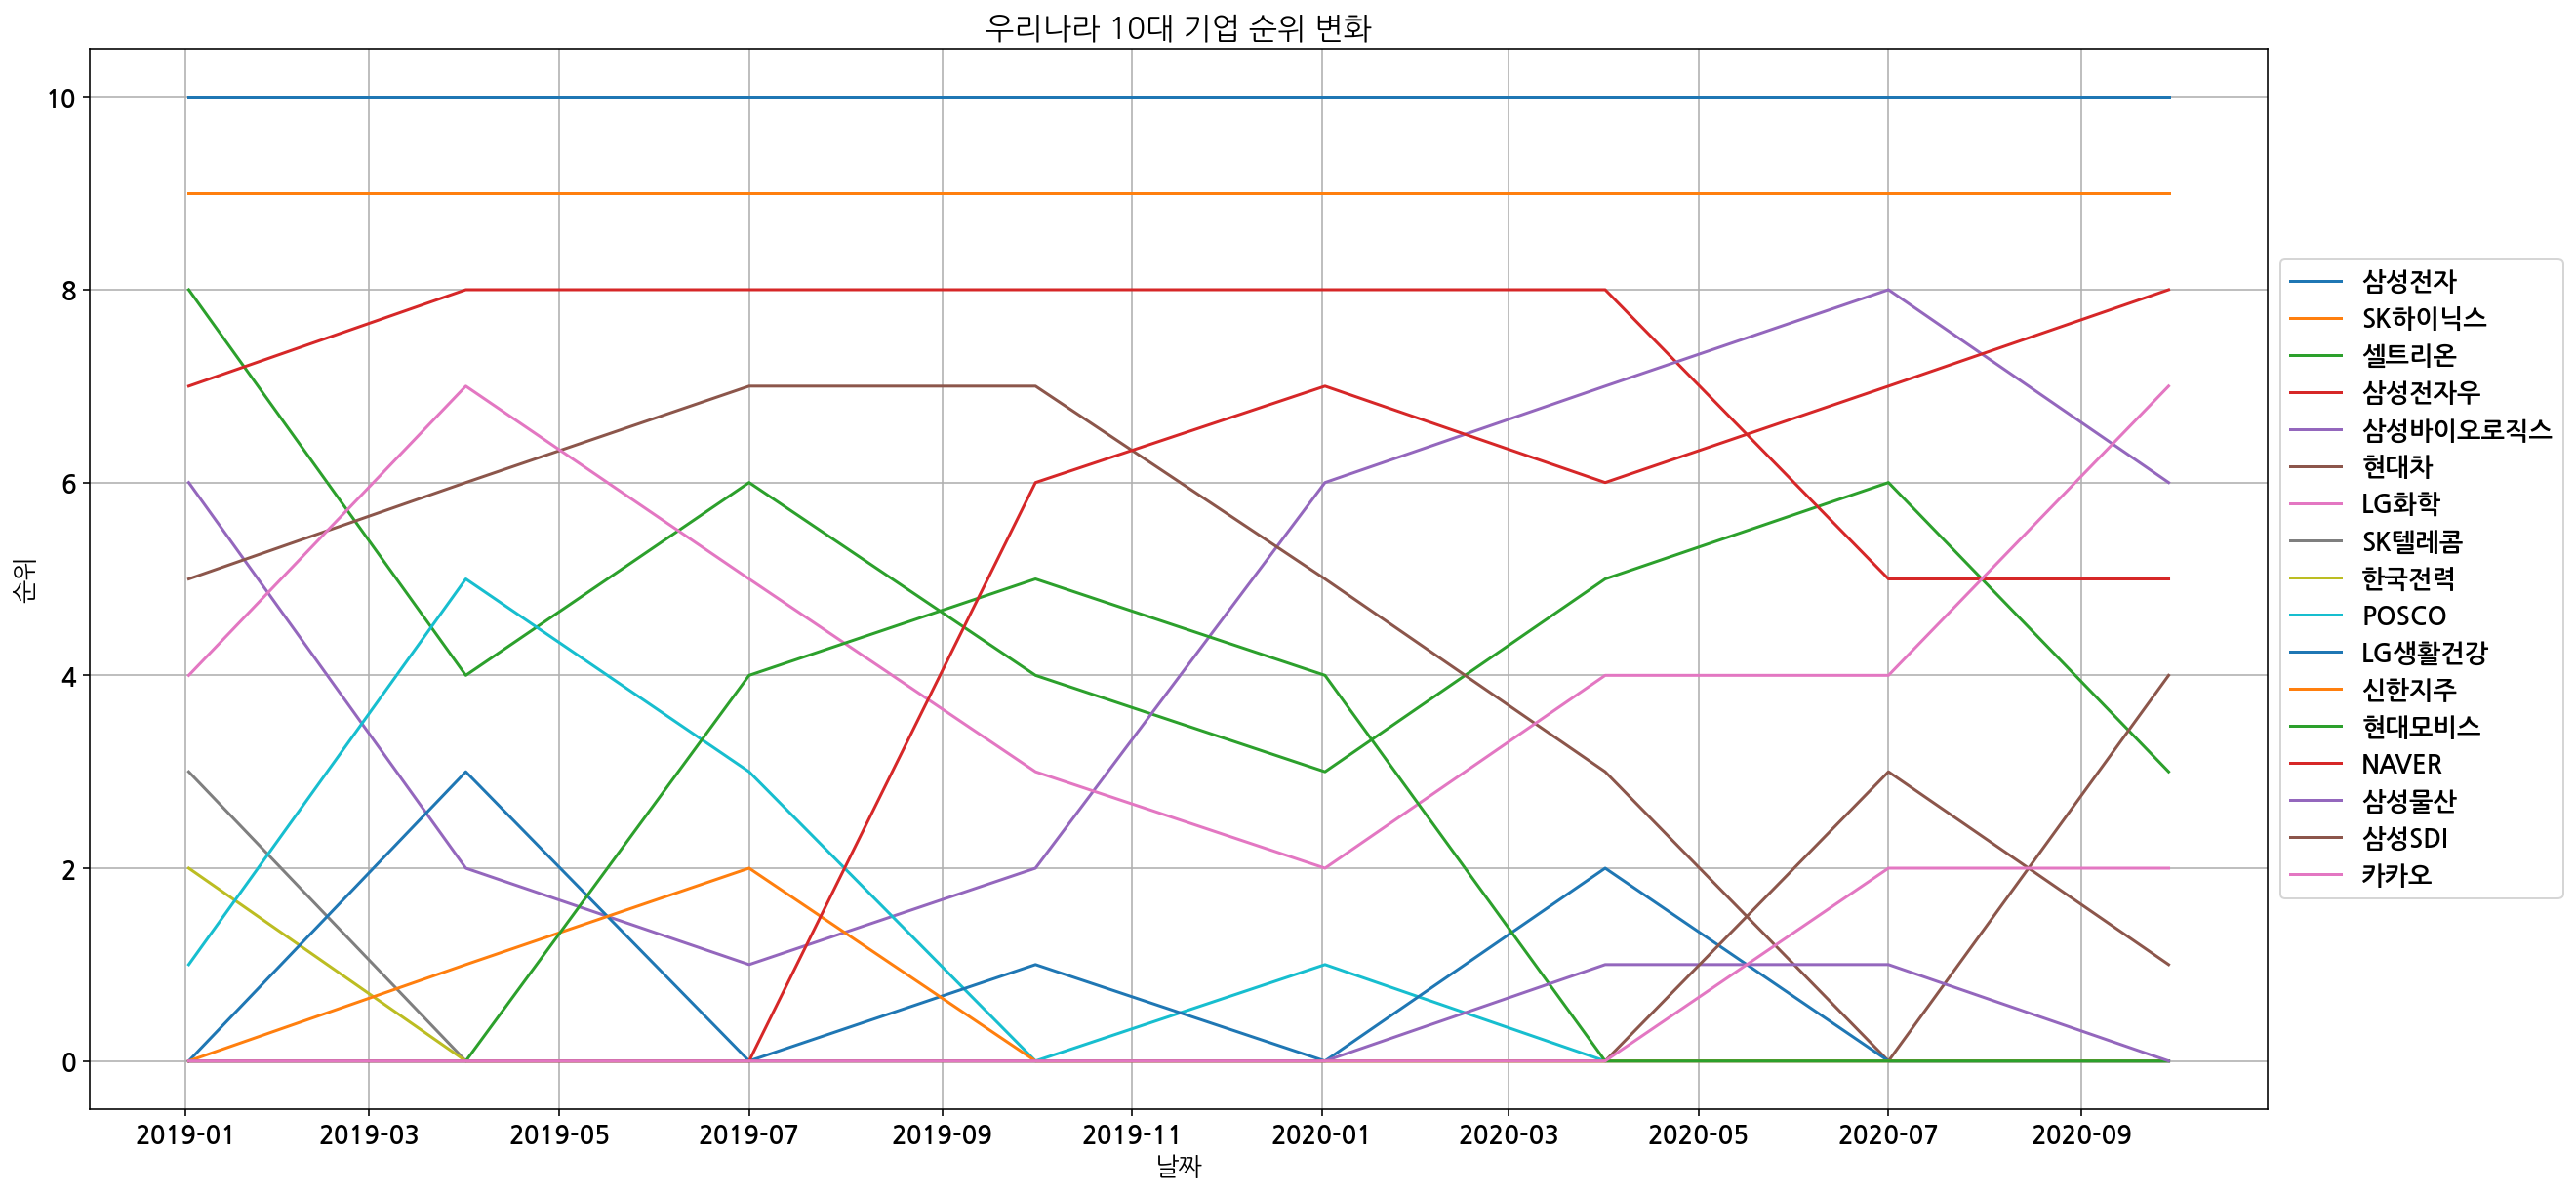

In [ ]:
# 각각의 컬럼 구하기
col_joungmog = []
col_siga = []
a = 1
for i in data.columns:
  if a % 2 == 0:
    col_joungmog.append(i)
  else:
    col_siga.append(i)
  a = a+1


# 각 종목별 순위 딕셔너리 만들기
dc = {}
col = col_joungmog
for i in col:
  a = 1
  for i2 in data[i]:
    if i2 in dc:
      s = dc.get(i2)
      s = s + [a]
      dc[i2] = s
    else:
      dc[i2] = [a]
    a = a+1

# 0으로된 데이터 프레임을 만듬
zero = np.zeros((len(col_joungmog),len(dc.keys())))
dummy = pd.DataFrame(zero, columns=dc.keys())

# 리스트로 변환
dummy_dict = dummy.to_dict('list')

# 종목별 순위 배분
row = 0 #행
rank = 10 #순위 (역순)
a = data[col_joungmog]
for i in col_joungmog:
  for i2 in a[i]:
    if i2 in dummy_dict:
      s = dummy_dict.get(i2)
      s[row] = rank
      dummy_dict[i2] = s
    rank = rank - 1
    if rank == 0:
      rank = 10
      row = row + 1

# 데이터 프레임으로 변환
joungmog_rank = pd.DataFrame(dummy_dict)
# joungmog_rank # 10 -> 1등 , 1 -> 10등, 0-> 없던 값

# 날짜 데이터를 얻음
from datetime import datetime
a_list = [20190102, 20190401, 20190701, 20191001,
          20200102, 20200401, 20200701, 20200929]
n = 0
for i in a_list:
  a = str(i)
  date = datetime.strptime(a, '%Y%m%d')
  a_list[n] = date
  n = n+1

drop_joungmog_rank = joungmog_rank.copy()

# 각 등수를 한 그래프에 나타냄
plt.figure(figsize=(20, 10))
for i in drop_joungmog_rank.columns:
  plt.plot(a_list, drop_joungmog_rank[i], label=i)

plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("날짜")
plt.ylabel("순위")
plt.title("우리나라 10대 기업 순위 변화")
plt.show()